#**Librerias**

In [7]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sc
from scipy.interpolate import interp1d

#**Datos PREM500**

**Link de archivo de perfil de Temperatura:** Debe ser  cargado a este notebook con el mismo nombre de descarga
- https://drive.google.com/file/d/1SfYOiGBhrp6lzNjYRX8hX7GPUDnA1Yig/view?usp=drive_link

In [5]:
# @title
#Obtenemos valores de Densidad
!wget http://ds.iris.edu/files/products/emc/data/PREM500/PREM500_IDV.csv

--2023-10-06 03:01:10--  http://ds.iris.edu/files/products/emc/data/PREM500/PREM500_IDV.csv
Resolving ds.iris.edu (ds.iris.edu)... 128.95.166.129
Connecting to ds.iris.edu (ds.iris.edu)|128.95.166.129|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35878 (35K) [text/csv]
Saving to: ‘PREM500_IDV.csv’

PREM500_IDV.csv     100%[===================>]  35.04K  --.-KB/s    in 0.04s   

2023-10-06 03:01:10 (940 KB/s) - ‘PREM500_IDV.csv’ saved [35878/35878]



In [21]:
# @title
#Manipulación de los datos
data_PREM = pd.read_csv('PREM500_IDV.csv').iloc[1:].astype('float64')

In [23]:
# @title
#Se toman los datos de
data_T = pd.read_csv('T.txt', sep = '\t')

In [24]:
# @title
#Datos de densidad, PREM500
r_P = data_PREM["(index -> (radius"].to_numpy()[1:]
rho_P = data_PREM["density"].to_numpy()[1:]

#Datos de Temperatura, PREM500
r_T = (data_T['R'].to_numpy())*1e3
T = data_T['T'].to_numpy()

In [30]:
# @title
#Corrección de Datos
r_P, i = np.unique(r_P, return_index = True)
j = np.delete(np.arange(0,503), i)

rho_P = np.flip(np.delete(rho_P, j))

r_P = np.flip(r_P)



---



#**Solución Sistema EDO**

In [37]:
# @title
#Interpoladores
f_rho = interp1d(r_P, rho_P)
f_T = interp1d(r_T, T)

#Función integradora
def sistema(y, r):
  G = 6.67428e-11

  rho = f_rho(r)
  g, m, P = y

  dm = 4*np.pi*(r**2)*rho
  dg = 4*np.pi*G*rho - (2*G*m/(r**3))
  dP = -rho*g

  return np.array([dg, dm, dP])

In [38]:
# @title
#Valores superficiales
g0 = 9.82
m0 = 5.9722e24
P0 = 0

#Condiciones Iniciales
y0 = np.array([g0 , m0, P0])

In [39]:
# @title
#Solución al sistema
sol = sc.odeint(sistema, y0, r_P[:-1])

In [ ]:
# @title
#Ajuste de datos
sol = np.c_[r_P[:-1]/1e3, rho_P[:-1],
            sol[:, 1]/1e24, sol[:, 2]/1e9,
            sol[:, 0], f_T(r_P[:-1])][:-45]

#**Graficaciones**

In [ ]:
# @title
#Algunos parametros de graficación
axis = ['$\\rho\,(kg/m^3)$', '$m\,(10^{24}\,kg)$',
          '$P\,(GPa)$', '$g\,(m/s^2)$', '$T(K)$']

l = [0, 2, 219, 395, 443]
rangos = [(sol[:,0][l[i]], sol[:,0][l[i+1]]) for i in range(4)]
labels = ['Crust', 'Mantle', 'Outter Core', 'Inner Core']
colores = ['sienna', 'forestgreen', 'midnightblue', 'maroon']

titles = ['\nPerfil de Densidad', '\nPerfil de Masa',
          '\nPerfil de Presión', '\nPerfil de Gravedad',
          '\nPerfil de Temperatura']

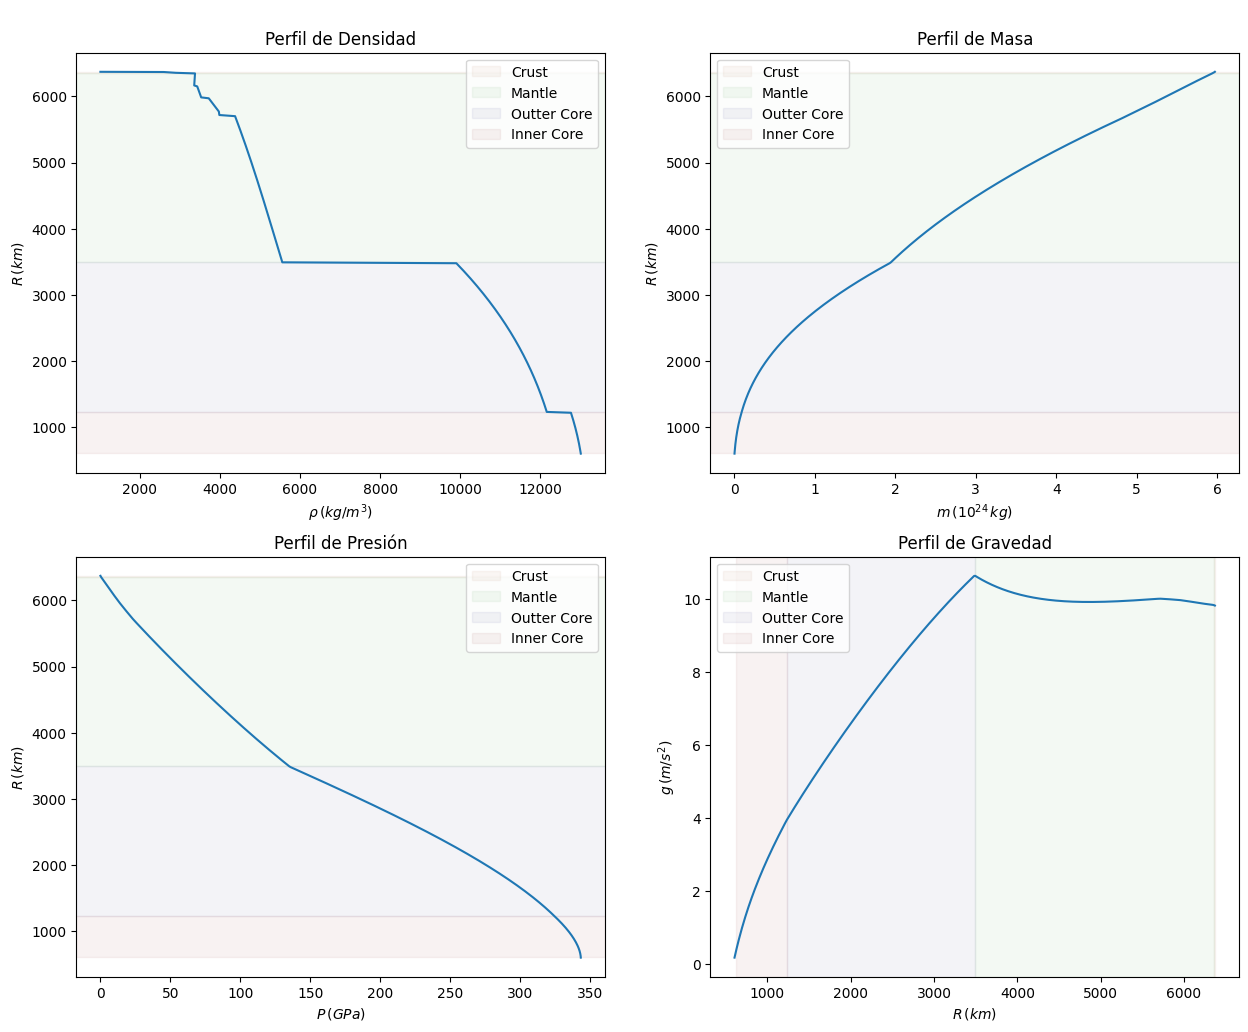

<Figure size 640x480 with 0 Axes>

In [41]:
# @title
plt.figure(figsize = (15,12))

for i in range(4):
  if i < 3:
    plt.subplot(2, 2, i + 1)
    plt.plot(sol[:, i+1], sol[:, 0])
    plt.ylabel('$R\,(km)$')
    plt.xlabel(axis[i])
    for j, (inicio, fin) in enumerate(rangos):
      plt.axhspan(inicio, fin, alpha = 0.05,
                  color = colores[j], label = labels[j])
    plt.legend()
    plt.title(titles[i])

  elif i == 3:
    plt.subplot(2, 2, i + 1)
    plt.plot(sol[:, 0], sol[:, i + 1])
    plt.xlabel('$R\,(km)$')
    plt.ylabel(axis[i])
    for j, (inicio, fin) in enumerate(rangos):
      plt.axvspan(inicio, fin, alpha = 0.05,
                  color = colores[j], label = labels[j])
    plt.legend()
    plt.title(titles[i])

plt.show()

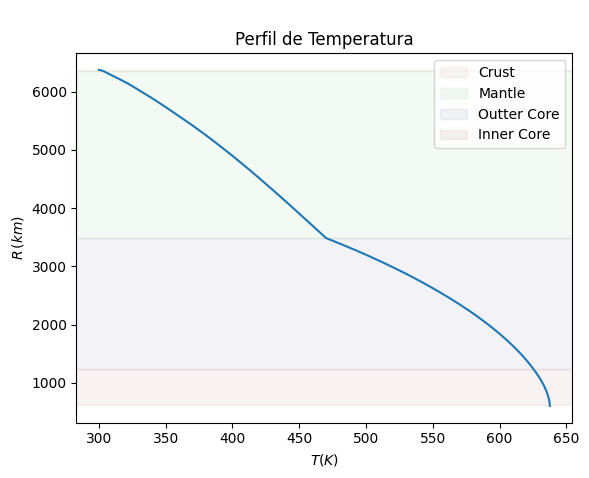

<Figure size 640x480 with 0 Axes>

In [42]:
# @title
plt.plot(sol[:, 5], sol[:, 0])
plt.ylabel('$R\,(km)$')
plt.xlabel(axis[4])

for j, (inicio, fin) in enumerate(rangos):
  plt.axhspan(inicio, fin, alpha = 0.05,
              color = colores[j], label = labels[j])

plt.legend()
plt.title(titles[4])
plt.show()